Цель исследования:
1. Определить зависимость пользователей с платной подпиской и без нее
2. Выяснить какие пользователи приносят больше прибыли в месяц
3. Проверить гипотезы, которые помогут сделать бизнес более прибыльным

Ход исследования:

Данные о пользователях, их поездках и статус подписки, я получу из файлов /datasets/users_go.csv, /datasets/rides_go.csv , /datasets/subscriptions_go.csv , соответственно. 

Данные надо проверить на наличие дубликатов и пропусков, если они есть надо устранить их, чтоб датасеты были готовы к полноценной работе. Далее мы проведем анализ пользователей и будес сравнивать результаты.

Таким образом, мое исследование пройдет в семь этапов:
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Обший вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

#### Шаг 1. Загрузка данных

In [2]:
data1 = pd.read_csv('/datasets/users_go.csv')
data2 = pd.read_csv('/datasets/rides_go.csv')
data3 = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
display(data1)
display(data2)
display(data3)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#исправил

In [4]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Шаг 2. Предобработка данных

In [7]:
data2['date'] = pd.to_datetime(data2['date'],format = '%Y-%m-%d')

In [8]:
data2['month'] = data2['date'].dt.month

In [9]:
print(data1.duplicated().sum())

31


In [10]:
data1 = data1.drop_duplicates().reset_index(drop=True)

In [11]:
print(data1.duplicated().sum())

0


In [12]:
data1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [13]:
data2.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [14]:
data3.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [15]:
display(data1)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


Исправил

Вывод: Пропущенных данных в таблицах нет.

Дубликаты имеются среди пользователей, удалили строки-дубликаты.

Добавили столбец month с номер месяца.

#### Шаг 3. Исследовательский анализ данных

Пятигорск         14.276402
Екатеринбург      13.298566
Ростов-на-Дону    12.907432
Краснодар         12.581486
Сочи              12.320730
Омск              11.929596
Тюмень            11.734029
Москва            10.951760
Name: city, dtype: float64


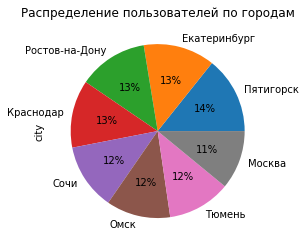

In [16]:
data1['city'].value_counts().plot(kind='pie', autopct = '%1.0f%%',title = 'Распределение пользователей по городам')
data1['city'].value_counts().sum()
print((data1['city'].value_counts() / data1['city'].value_counts().sum())*100)

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

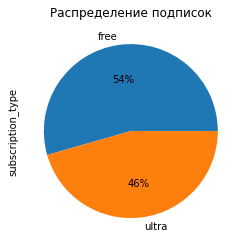

In [17]:
data1['subscription_type'].value_counts().plot(kind='pie', autopct = '%1.0f%%',title = 'Распределение подписок')
data1['subscription_type'].describe()

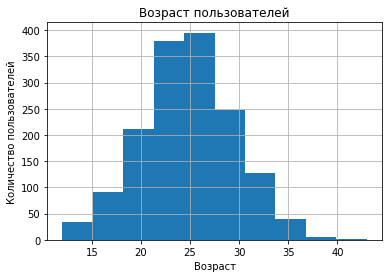

In [18]:
plt.hist(data1['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

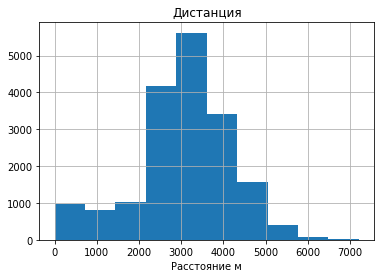

In [19]:
plt.hist(data2['distance'], bins = 10)
plt.title('Дистанция')
plt.xlabel('Расстояние м')
plt.grid()
plt.show()

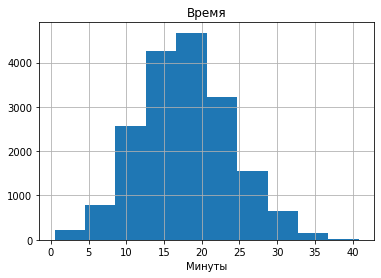

In [20]:
plt.hist(data2['duration'], bins = 10)
plt.title('Время')
plt.xlabel('Минуты')
plt.grid()
plt.show()

Вывод: 
3.1 частота встречаемости городов; в целом все города встречаются одинаковое количество раз, нет большого разброса между ними
3.2 соотношение пользователей с подпиской и без подписки; пользователей с бесплатной подпиской чуть больше, чем пользователей оформивших подписку
3.3 возраст пользователей; самому младшему пользователю 12, а самому старшему 43. средний показатель по возрасту 24-25 лет
3.4 расстояние, которое пользователь преодолел за одну поездку; в среднем пользователь совершает поездки на расстояние 2,5 - 3 км
3.5 продолжительность поездок. в среднем пользователи берут самокаты на 13-20 минут

#### Шаг 4. Объединение данных

In [21]:
len(data1)

1534

In [22]:
len(data2)

18068

In [23]:
len(data3)

2

In [24]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [26]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [27]:
data = data1.merge(data2)
data = data.merge(data3)
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [29]:
data_free = data.query('subscription_type == "free"')
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [30]:
data_ultra = data.query('subscription_type == "ultra"')
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


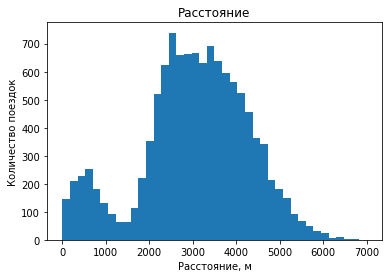

<Figure size 1440x1440 with 0 Axes>

In [31]:
plt.hist(data_free['distance'],bins=40, range = (0, 7000))
plt.title('Расстояние')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

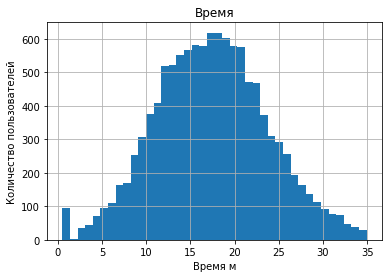

In [32]:
plt.hist(data_free['duration'], bins = 40)
plt.title('Время')
plt.xlabel('Время м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

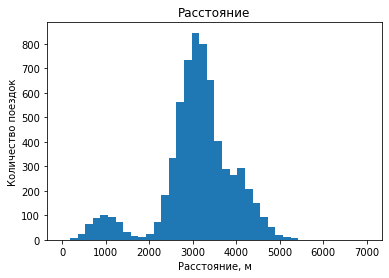

<Figure size 1440x1440 with 0 Axes>

In [33]:
plt.hist(data_ultra['distance'],bins=40, range = (0, 7000))
plt.title('Расстояние')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

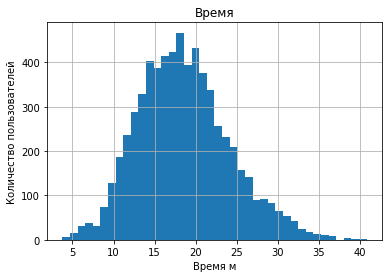

In [34]:
plt.hist(data_ultra['duration'], bins = 40)
plt.title('Время')
plt.xlabel('Время м')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

Вывод: БОльшая часть Пользователей с бесплатной подпиской проезжают на самокате в среднем от 2,5 до 4 км и проводят за ним от 10 до 25 минут, но есть и те котрые ездят дальше 4 км и находятся на самокате больше получаса.
А пользователи с платной подпиской в среднем ездят на самокате на расстояние 2,5-3,5 км , и находтся на нем в среднем от 12 до 22 минут


#### Шаг 5. Подсчёт выручки

In [35]:
display(data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [36]:
data['duration'] = np.ceil(data['duration'])

Может так! 
может я не понимаю до конца слово агрегирование данных, для меня это вроде как соединение данных,
если не сложно можете написать что понимается под этим словом

In [37]:
display(data)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,17.0,2021-11-27,11,8,50,0


In [38]:
total_data = pd.pivot_table(data,index=['month','user_id'], values=['distance','duration','name','subscription_type'],
                           aggfunc={'distance':sum,'duration':sum,'name':len,'subscription_type':min})

In [39]:
total_data


distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra
...                    ...       ...   ...               ...
12    1525     4597.854350      34.0     1              free
      1526     3644.121544      23.0     1              free
      1528     3998.569324      11.0     1              free
      1532     6111.889853      42.0     2              free
      1534     2371.711192      16.0     1              free

[11331 rows x 4 columns]

In [40]:
total_data['duration'] = np.ceil(total_data['duration'])

In [41]:
total_data.head(35)

distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra
      13       6687.987446      42.0     2             ultra
      14       7699.643820      35.0     2             ultra
      15       4187.621459      39.0     1             ultra
      20       3516.719208      29.0     1             ultra
      22       3058.692225      13.0     1             ultra
      25       3440.353053      17.0     1             ultra
      26       6545.964099      28.0     2             ultra
      30       7774.720501      25.0     2             ultra
      32       3734.993902      25.0     1             ultra
      35       9707.810053      57.0     3             ultra
      42       4329.769187      23.0     1             ultra
      43       6322.206034      48.0     2             ultra
      44       2944.410629      19.0     2             ultra
      45       3702.424319      27.0     2             ultra
      46       3242.092435      20.0     1             ultra
      51       7285.366019      55.0     2             ultra
      54       2600.277031      19.0     1             ultra
      55       6353.654177      37.0     2             ultra
      56       3494.685027      21.0     1             ultra
      57       3417.126834      26.0     1             ultra
      60       5293.063577      31.0     2             ultra
      61       8167.266069      59.0     4             ultra
      63       2948.688257      22.0     1             ultra
      64       4585.303566      25.0     1             ultra
      66       5532.118721      48.0     3             ultra
      67       2556.689615      12.0     1             ultra
      69       2997.826637      19.0     1             ultra
      70       6062.977274      43.0     2             ultra
      71       3179.305574      20.0     1             ultra
      72       3713.885705      33.0     1             ultra

Не совсем понял что именно требуется, вроде округлил время в большую сторону

In [42]:
total_data

distance  duration  name subscription_type
month user_id                                               
1     1        7027.511294      42.0     2             ultra
      3        3061.777147      13.0     1             ultra
      5        3914.646990      13.0     1             ultra
      7        6478.080979      28.0     2             ultra
      12       3577.151148      33.0     1             ultra
...                    ...       ...   ...               ...
12    1525     4597.854350      34.0     1              free
      1526     3644.121544      23.0     1              free
      1528     3998.569324      11.0     1              free
      1532     6111.889853      42.0     2              free
      1534     2371.711192      16.0     1              free

[11331 rows x 4 columns]

In [43]:
def pribyl(row):
    if row['subscription_type'] == 'ultra':
        return row['duration'] * 6 + 199
    else:
        return row['duration'] * 8 + row['name'] * 50

In [44]:
total_data['pribyl+'] = total_data.apply(pribyl,axis=1)

In [45]:
total_data

distance  duration  name subscription_type  pribyl+
month user_id                                                        
1     1        7027.511294      42.0     2             ultra    451.0
      3        3061.777147      13.0     1             ultra    277.0
      5        3914.646990      13.0     1             ultra    277.0
      7        6478.080979      28.0     2             ultra    367.0
      12       3577.151148      33.0     1             ultra    397.0
...                    ...       ...   ...               ...      ...
12    1525     4597.854350      34.0     1              free    322.0
      1526     3644.121544      23.0     1              free    234.0
      1528     3998.569324      11.0     1              free    138.0
      1532     6111.889853      42.0     2              free    436.0
      1534     2371.711192      16.0     1              free    178.0

[11331 rows x 5 columns]

In [46]:
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


#### Шаг 6. Проверка гипотез

# 6.1

H0: время у обоих групп равны
H1: пользователи с подпиской тратят больше времени на поездки

In [47]:
results = st.ttest_ind(data_ultra['duration'], data_free['duration'], alternative = 'greater')
alpha = 0.05

In [48]:
print('p-значение:', results.pvalue)

p-значение: 1.2804098316645618e-34


In [49]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


Вывод: Отвергли гипотезу о том, что время поездки пользователей платных подписок равно времени поездки пользователей бесплатных подписок

# 6.2

H0: Пользователи с подпиской за одну поездку проезжают ровно 3130 метров
H1: Пользователи с подпиской за одну поездку проезжают меньше 3130 метров

In [50]:
alpha1 = 0.05
dist = 3130

In [51]:
results1 = st.ttest_1samp(data_ultra['distance'], dist, alternative='greater')

In [52]:
print('p-значение:', results1.pvalue)

p-значение: 0.9195368847849785


In [53]:
if results1.pvalue < alpha: # сравните полученный p-value и уровень значимости)
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


Вывод: пользователи не превышают 3130 метров за поездку

# 6.3

H0: Месячные выручки равны у обоих групп
H1: Месячная выручка платной подписки выше чем у бесплатной 

In [54]:
total_data

distance  duration  name subscription_type  pribyl+
month user_id                                                        
1     1        7027.511294      42.0     2             ultra    451.0
      3        3061.777147      13.0     1             ultra    277.0
      5        3914.646990      13.0     1             ultra    277.0
      7        6478.080979      28.0     2             ultra    367.0
      12       3577.151148      33.0     1             ultra    397.0
...                    ...       ...   ...               ...      ...
12    1525     4597.854350      34.0     1              free    322.0
      1526     3644.121544      23.0     1              free    234.0
      1528     3998.569324      11.0     1              free    138.0
      1532     6111.889853      42.0     2              free    436.0
      1534     2371.711192      16.0     1              free    178.0

[11331 rows x 5 columns]

In [55]:
ultra_pribyl = total_data.loc[total_data['subscription_type'] == 'ultra', 'pribyl+']

In [56]:
free_pribyl = total_data.loc[total_data['subscription_type'] == 'free', 'pribyl+']

In [57]:
results2 = st.ttest_ind(ultra_pribyl,free_pribyl, alternative = 'greater')

In [58]:
print('p-значение:', results2.pvalue)

p-значение: 1.8850394384715216e-31


In [59]:
if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


Вывод: Да мы подтвердили гипотезу о том что выручка с платных подписок больше, чем у бесплатных.

# 6.4

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.
Будем сравнивать с помощью scipy.stats.ttest_rel()

#### Шаг 7. Распределения

Загрузили 3 датасета с информацией о пользователях, поездках и подпиской.

Преобразовали тип данных, проверили на налчие дуликатов и пропусков. Пропусков не было в датасетах, дубликаты устранили. Поменяли тип данных у стобца date к типу даты. Добавили столбец с номеров месяца.

Сделали исследовательский анализ данных
Выявили частоту встречаемости городов, распределение по городам у пользователей примерно одинаковое. идером по количеству пользователей является Пятигорск - 219 пользователей. Меньше всего пользователей в Москве - 168.
Пользователей с бесплатной подпиской больше - 835 человек, что является ~54% от общего числа пользователей. На платной подписке сидит 699 пользователей, что соответственно является ~46%.
Возраст пользователей укладывается в промежуток от 20 до 30 лет
В основном пользователи проезжают от 2.5 км до 4 км.
Чаще всего длительность поездки состовляет 13 - 22 минут
Дальше визуализировали информацию о расстоянии и времени поездки для пользоватей каждого тарифа.

Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.
Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.

Проверили гипотезы:

Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе
Отвергли нулевую гипотезу
Пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку
Не удалось отвергнуть нулевую гипотезу
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки
Отвергли нулевую гипотезу